IMPORTING MODULES

In [28]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

DATA PROFILING

In [29]:
data=pd.read_csv("house_prices.csv")

In [30]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [34]:
data.shape

(1460, 81)

EVALUATION OF MISSING DATA

In [35]:
missing_data=data.isna()

In [36]:
missing_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [37]:
missing_count=missing_data.sum(axis=0)
missing_count

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [38]:
percent_missing=100*missing_data.mean(axis=0)
percent_missing

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [39]:
missing_data_summary=pd.concat([missing_count,percent_missing],keys=["missing_count","percent_missing"],axis=1).sort_values(by="percent_missing",ascending=False)

In [40]:
missing_data_summary

,missing_count,percent_missing
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


PLOTING GRAOH FOR MISSING DATA

In [41]:
missing_data_columns=data.columns[missing_data.any()]
missing_data_columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

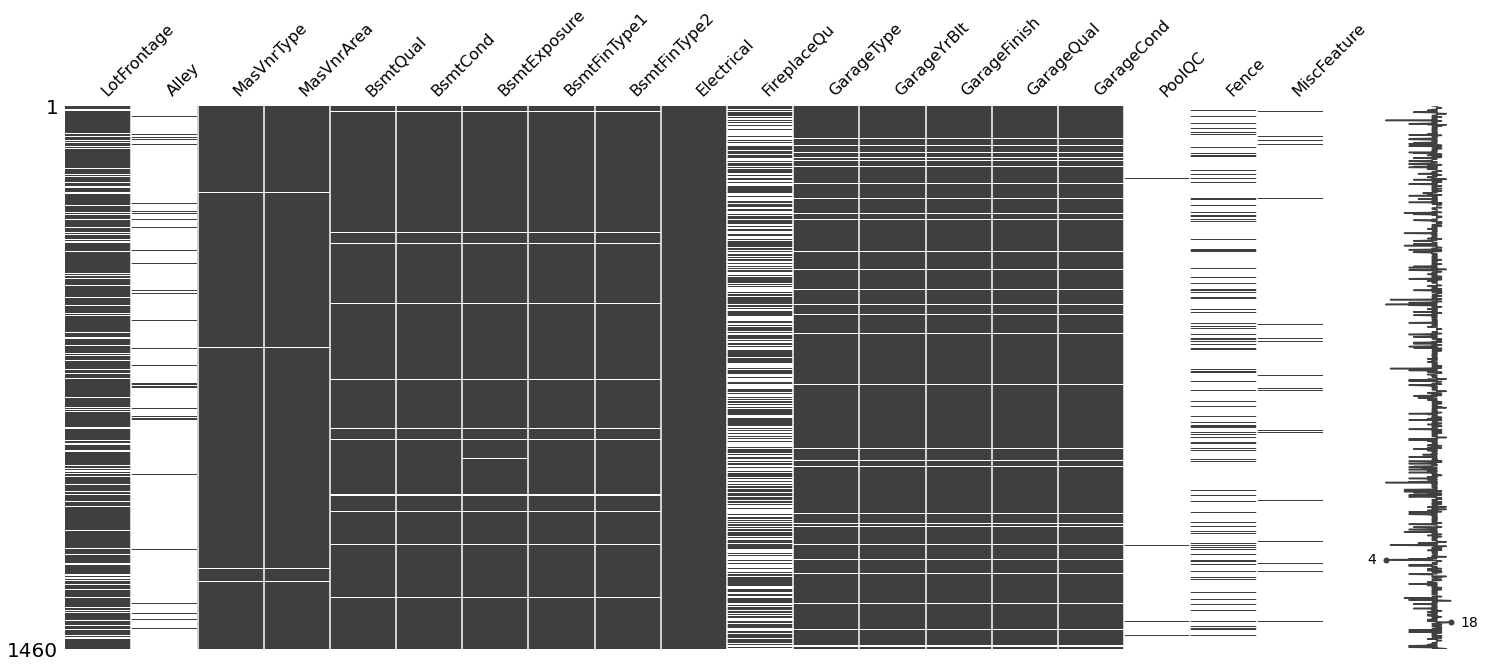

In [42]:
msno.matrix(data[missing_data_columns])
plt.show()

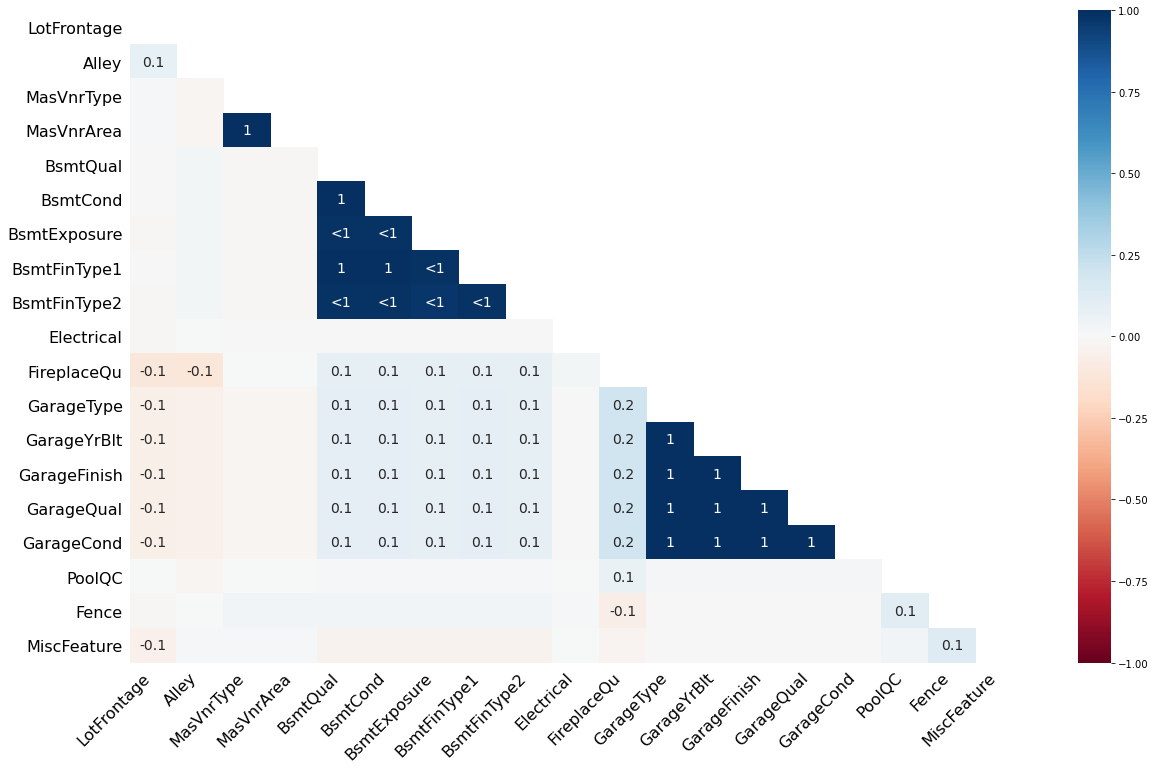

In [43]:
msno.heatmap(data[missing_data_columns])
plt.show()

IMPUTATION

In [44]:
columns_needed= missing_data_summary.loc[(missing_data_summary["percent_missing"]<80) & (missing_data_summary["percent_missing"]>0)]

In [45]:
columns_needed=columns_needed.T

In [46]:
columns_needed=columns_needed.columns

In [47]:
columns_needed=data[columns_needed.tolist()]

In [48]:
columns_needed

,FireplaceQu,LotFrontage,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,MasVnrArea,MasVnrType,Electrical
0,NaN,65.0,2003.0,TA,Attchd,RFn,TA,Unf,No,Gd,TA,GLQ,196.0,BrkFace,SBrkr
1,TA,80.0,1976.0,TA,Attchd,RFn,TA,Unf,Gd,Gd,TA,ALQ,0.0,None,SBrkr
2,TA,68.0,2001.0,TA,Attchd,RFn,TA,Unf,Mn,Gd,TA,GLQ,162.0,BrkFace,SBrkr
3,Gd,60.0,1998.0,TA,Detchd,Unf,TA,Unf,No,TA,Gd,ALQ,0.0,None,SBrkr
4,TA,84.0,2000.0,TA,Attchd,RFn,TA,Unf,Av,Gd,TA,GLQ,350.0,BrkFace,SBrkr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,62.0,1999.0,TA,Attchd,RFn,TA,Unf,No,Gd,TA,Unf,0.0,None,SBrkr
1456,TA,85.0,1978.0,TA,Attchd,Unf,TA,Rec,No,Gd,TA,ALQ,119.0,Stone,SBrkr
1457,Gd,66.0,1941.0,TA,Attchd,RFn,TA,Unf,No,TA,Gd,GLQ,0.0,None,SBrkr
1458,NaN,68.0,1950.0,TA,Attchd,Unf,TA,Rec,Mn,TA,TA,GLQ,0.0,None,FuseA


In [49]:
data["FireplaceQu"]=data.loc[:,"FireplaceQu"].fillna("NA")

In [50]:
data["FireplaceQu"]

0       NA
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    NA
1459    NA
Name: FireplaceQu, Length: 1460, dtype: object

In [51]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


ANALYSING THE TAGERT COLUMN

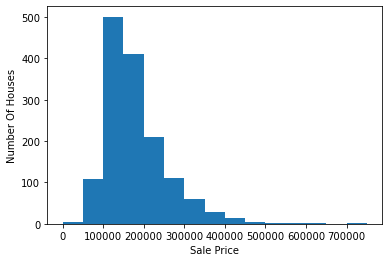

In [54]:
plt.figure()
plt.hist(data["SalePrice"],bins=range(0,800000,50000))
plt.xlabel("Sale Price")
plt.ylabel("Number Of Houses")
plt.show()

FEATURES DESCRIPTIONS

In [61]:
columns_needed_object=columns_needed.select_dtypes(include=np.object)

In [62]:
columns_needed_object

,FireplaceQu,GarageCond,GarageType,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,MasVnrType,Electrical
0,NaN,TA,Attchd,RFn,TA,Unf,No,Gd,TA,GLQ,BrkFace,SBrkr
1,TA,TA,Attchd,RFn,TA,Unf,Gd,Gd,TA,ALQ,None,SBrkr
2,TA,TA,Attchd,RFn,TA,Unf,Mn,Gd,TA,GLQ,BrkFace,SBrkr
3,Gd,TA,Detchd,Unf,TA,Unf,No,TA,Gd,ALQ,None,SBrkr
4,TA,TA,Attchd,RFn,TA,Unf,Av,Gd,TA,GLQ,BrkFace,SBrkr
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,TA,Attchd,RFn,TA,Unf,No,Gd,TA,Unf,None,SBrkr
1456,TA,TA,Attchd,Unf,TA,Rec,No,Gd,TA,ALQ,Stone,SBrkr
1457,Gd,TA,Attchd,RFn,TA,Unf,No,TA,Gd,GLQ,None,SBrkr
1458,NaN,TA,Attchd,Unf,TA,Rec,Mn,TA,TA,GLQ,None,FuseA


In [63]:
columns_needed_object.nunique()

FireplaceQu     5
GarageCond      5
GarageType      6
GarageFinish    3
GarageQual      5
BsmtFinType2    6
BsmtExposure    4
BsmtQual        4
BsmtCond        4
BsmtFinType1    6
MasVnrType      4
Electrical      5
dtype: int64

In [72]:
House=data["HouseStyle"].value_counts()
House

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

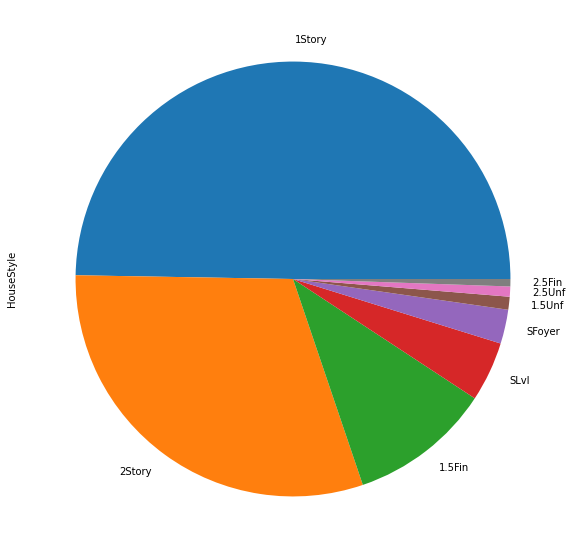

In [74]:
plt.figure(figsize=(10,10))
House.plot(kind="pie")
plt.show()

In [77]:
columns_needed_numeric=data.select_dtypes(include=np.number)
columns_needed_numeric.nunique()

Id               1460
MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [80]:
columns_needed_numeric.skew().sort_values(ascending=True)

GarageYrBlt      -0.649415
YearBuilt        -0.613461
YearRemodAdd     -0.503562
GarageCars       -0.342549
Id                0.000000
FullBath          0.036562
YrSold            0.096269
GarageArea        0.179981
BedroomAbvGr      0.211790
MoSold            0.212053
OverallQual       0.216944
BsmtFullBath      0.596067
Fireplaces        0.649565
HalfBath          0.675897
TotRmsAbvGrd      0.676341
OverallCond       0.693067
2ndFlrSF          0.813030
BsmtUnfSF         0.920268
GrLivArea         1.366560
1stFlrSF          1.376757
MSSubClass        1.407657
TotalBsmtSF       1.524255
WoodDeckSF        1.541376
BsmtFinSF1        1.685503
SalePrice         1.882876
LotFrontage       2.163569
OpenPorchSF       2.364342
MasVnrArea        2.669084
EnclosedPorch     3.089872
BsmtHalfBath      4.103403
ScreenPorch       4.122214
BsmtFinSF2        4.255261
KitchenAbvGr      4.488397
LowQualFinSF      9.011341
3SsnPorch        10.304342
LotArea          12.207688
PoolArea         14.828374
M

In [81]:
columns_needed_numeric.kurt().sort_values(ascending=True)

YearRemodAdd      -1.272245
Id                -1.200000
YrSold            -1.190601
HalfBath          -1.076927
FullBath          -0.857043
BsmtFullBath      -0.839098
2ndFlrSF          -0.553464
YearBuilt         -0.439552
GarageYrBlt       -0.418341
MoSold            -0.404109
Fireplaces        -0.217237
OverallQual        0.096293
GarageCars         0.220998
BsmtUnfSF          0.474994
TotRmsAbvGrd       0.880762
GarageArea         0.917067
OverallCond        1.106413
MSSubClass         1.580188
BedroomAbvGr       2.230875
WoodDeckSF         2.992951
GrLivArea          4.895121
1stFlrSF           5.745841
SalePrice          6.536282
OpenPorchSF        8.490336
MasVnrArea        10.082417
EnclosedPorch     10.430766
BsmtFinSF1        11.118236
TotalBsmtSF       13.250483
BsmtHalfBath      16.396642
LotFrontage       17.452867
ScreenPorch       18.439068
BsmtFinSF2        20.113338
KitchenAbvGr      21.532404
LowQualFinSF      83.234817
3SsnPorch        123.662379
LotArea          203

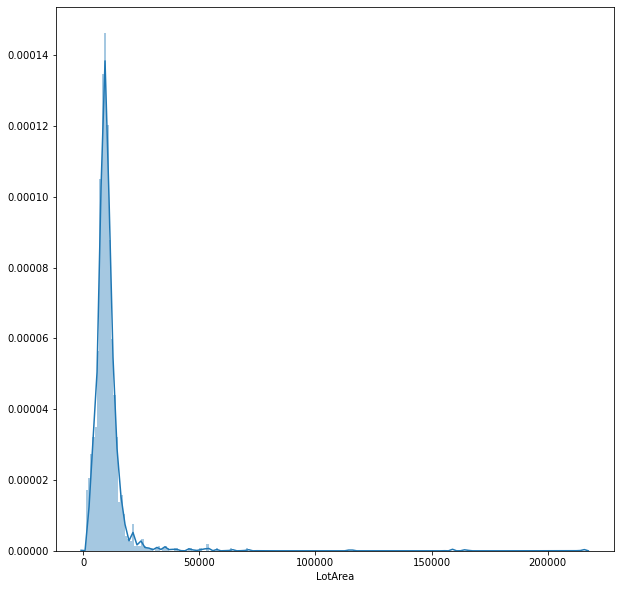

In [87]:
plt.figure(figsize=(10,10))
sns.distplot(data["LotArea"].dropna(),bins=range(0,100000,1000))
plt.show()